<div class="image-container">
  <img class="image" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Logo-ITESO-Vertical-SinFondo-png.png" width="300" height="300" style="float: right">
</div>


<p>
    <font style = "font-family:Cambria">          
    <h2><font color="#191970" size = 6 >
        001 Microstructure
    </font></h2>         
    <br>         
    <font color='navy' size = 6>Project 1</font>
    <br> 
    <h3><font size =4>Collaborators:</font></h3> 
    <ul>
        <li>Ana Sofia Brizuela Casarin</li>
        <li>Samuel Alejandro Perez Avalos</li>
        <li>Juan Antonio Mugica Liparoli</li>
    </ul>               
    </font>
</p>

In [35]:
# Import libraries

import matplotlib.pyplot as plt

import numpy as np

from scipy import integrate

from scipy.stats import lognorm

from scipy import integrate, optimize

from scipy.stats import weibull_min

According to this parameters

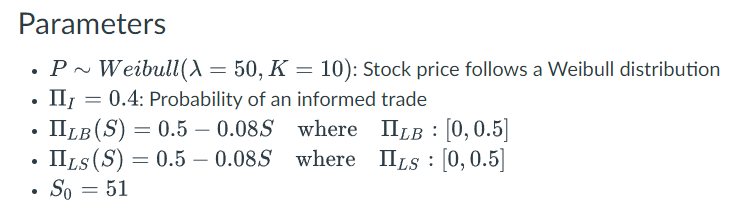

In [36]:
# Initial data

So = 51

Prob_Inf = 0.4

Prob_Liq = 1 - Prob_Inf

# Parameters pdf Weibull
lambda_ = 50

k = 10

size = 100

* Plot the price distribution with the Weibull distribution

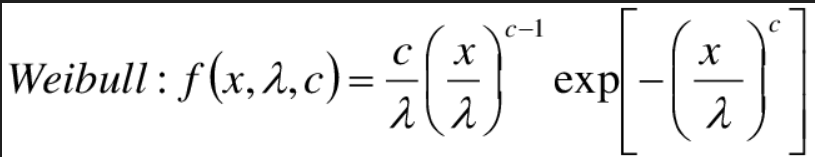

In [37]:
# Generate random values of pdf Weibull
P = np.random.weibull(k, size) * lambda_

def weibull_pdf(x, lambda_, k):
    return (k / lambda_) * (x / lambda_)**(k - 1) * np.exp(-(x / lambda_)**k)

def Ask_Bid(P, Ask, Bid, lambda_, k, Prob_Inf, Prob_Liq, So):
    S_lb = Ask - So  # Profit
    S_ls = So - Bid  # Loss

    P_lb = 0.5 - 0.08 * S_lb
    P_ls = 0.5 - 0.08 * S_ls

    def f1(P):
        return (P - Ask) * weibull_pdf(P, lambda_, k)

    def f2(P):
        return (Bid - P) * weibull_pdf(P, lambda_, k)

    Int1, _ = integrate.quad(f1, Ask, 100)
    Int2, _ = integrate.quad(f2, 0.001, Bid)

    L = Int1 + Int2

    U = (Ask - So) * Prob_Inf * P_lb + (So - Bid) * Prob_Liq * P_ls - Prob_Inf * L

    return -U  # Negative to comply with the minimize convention

def Optimize_Ask_Bid(Prob_Inf, Prob_Liq, So, lambda_, k):
    bounds = [(51, None), (0.001, 51)]  # Restrictions for ask and bid > 0

    result = optimize.minimize(
        lambda x: Ask_Bid(P, x[0], x[1], lambda_, k, Prob_Inf, Prob_Liq, So),
        x0=[56, 48],  # Initial values for ask and bid
        bounds=bounds,
    )
    return result.x[0], result.x[1]


# Obtain optimum values for Ask & Bid
Ask_opt, Bid_opt = Optimize_Ask_Bid(Prob_Inf, Prob_Liq, So, lambda_, k)

print("The optimal Ask is:", Ask_opt)
print("The optimal Bid is:", Bid_opt)


The optimal Ask is: 54.66873470528625
The optimal Bid is: 46.323152638629956


### Plot PDF with vertical lines for Ask_opt y Bid_opt

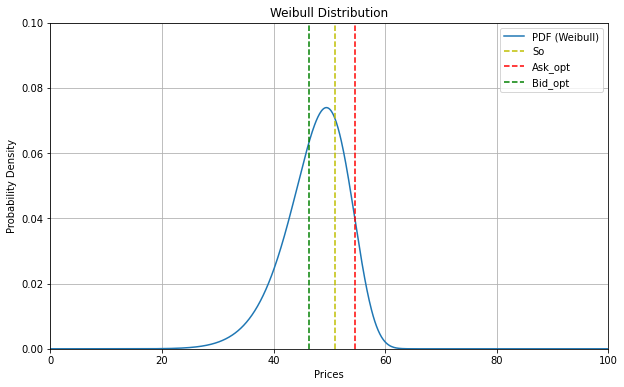

In [38]:


# Create range of values x for plot of PDF (Weibull)
x_values = np.linspace(0, 100, 1000)

# Plot PDF with vertical lines for Ask_opt y Bid_opt
plt.figure(figsize=(10, 6))
plt.plot(x_values, weibull_pdf(x_values, lambda_, k), label='PDF (Weibull)')

plt.axvline(x=So, color='y', linestyle='--', label='So')
plt.axvline(x=Ask_opt, color='r', linestyle='--', label='Ask_opt')
plt.axvline(x=Bid_opt, color='g', linestyle='--', label='Bid_opt')

plt.xlim(0, 100)
plt.ylim(0, 0.1)
plt.title('Weibull Distribution')
plt.xlabel('Prices')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



According to

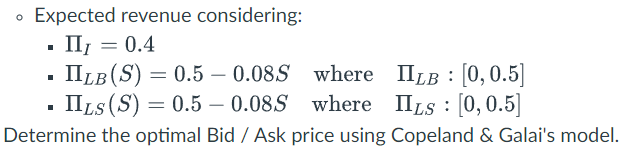

We have that

In [39]:
def pi_lb(s):
    prob = (0.5 - 0.08 * s)
    return prob if prob > 0 else 0

spreads = np.linspace(0, Ask_opt - Bid_opt, 100)

q_line = spreads
Prob_Liq = 0.6
r_line = Prob_Liq * spreads
o_line = list(map(lambda s: pi_lb(s) * Prob_Liq * s, spreads))

#q_line: All purchases are from liquidity traders
#r_line: Profit if 40% of the trades are from liquidity traders
#o_line: Profit if a liquidity trader makes a purchase

### Plot all together

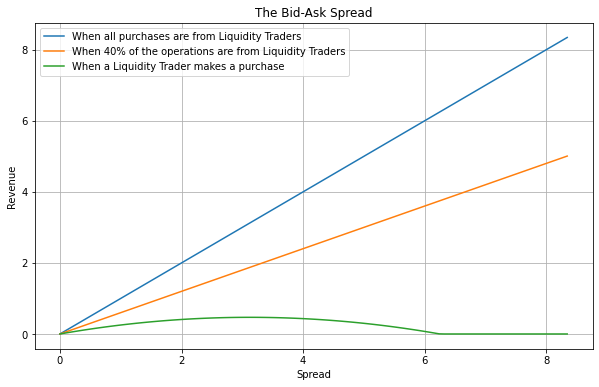

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(spreads, q_line, label='When all purchases are from Liquidity Traders')
plt.plot(spreads, r_line, label='When 40% of the operations are from Liquidity Traders')
plt.plot(spreads, o_line, label='When a Liquidity Trader makes a purchase')

plt.title('The Bid-Ask Spread')
plt.xlabel('Spread')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()